<a href="https://colab.research.google.com/github/suriyakanth2711/RoBo-0.0/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
import numpy as np
import pandas as pd

In [97]:
data = pd.read_excel("/content/SCFP2009panel.xlsx")
data.head()

,YY1,Y1,WGT09,AGE07,AGECL07,EDUC07,EDCL07,MARRIED07,KIDS07,LIFECL07,FAMSTRUCT07,RACECL,H_RACECL,RACE,H_RACE,OCCAT107,OCCAT207,INDCAT07,HHEALTH07,SPHEALTH07,INCOME07,WAGEINC07,BUSSEFARMINC07,INTDIVINC07,KGINC07,SSRETINC07,TRANSFOTHINC07,PENACCTWD07,NORMINC07,RISK07,PSAVING07,WSAVED07,SAVED07,SAVRES1,SAVRES2,SAVRES3,SAVRES4,SAVRES5,SAVRES6,SAVRES7,...,ORESREPCT,NNRESREPCT,BUSPCT,OTHNFINPCT,DEBTPCT,MRTHELPCT,RESDBTPCT,OTHLOCPCT,CCBALPCT,INSTALLPCT,ODEBTPCT,TPAYPCT,MORTPAYPCT,CONSPAYPCT,REVPAYPCT,EQUITYPCT,DEQPCT,VOWNPCT,RETEQPCT,NORMINCPCT,CHECKINGPCT,MSAVINGPCT,CALLPCT,HOMEEQPCT,IRAKHPCT,PENEQPCT,VEHINSTPCT,EDNINSTPCT,OTHINSTPCT,HELOCPCT,NHMORTPCT,WAGEINCPCT,BUSSEFARMINCPCT,INTDIVINCPCT,KGINCPCT,SSRETINCPCT,TRANSFOTHINCPCT,PSAVINGPCT,LEVERAGEPCT,I
0,1,11,11668.134198,47,3,12,2,1,0,2,5,2,2,3,3,1,3,1,3,3,56443.744181,56443.744181,0.0,0.0,0.0,0.0,0.0,0,69223.459844,3,5177.988243,1,0,0,0,0,0,0,0,1,...,0.0,7100000.0,0.0,0.0,229.539027,-23.766370,0.0,0.0,-98.841249,3882.428459,0.0,-44.309806,-3.437401,-37.234311,-98.841249,6764000.0,1700000.0,-51.718701,5064000.0,-45.313644,168.22944,1400000.0,0.0,-54.412507,6000000.0,5064000.0,-11.224708,0.0,25000000.0,0.0,-21.052632,-32.931828,0.0,15939.278937,0.0,0.0,0.0,93.125197,270.403054,57
1,1,12,11823.456494,47,3,12,2,1,0,2,5,2,2,3,3,1,3,1,3,3,56443.744181,56443.744181,0.0,0.0,0.0,0.0,0.0,0,69223.459844,3,5177.988243,1,0,0,0,0,0,0,0,1,...,0.0,5400000.0,0.0,0.0,231.322864,-23.766370,0.0,0.0,-98.841249,4094.744747,0.0,-44.309806,-3.437401,-37.234311,-98.841249,4569000.0,1800000.0,-51.718701,2769000.0,-45.313644,168.22944,1700000.0,0.0,-34.934215,6100000.0,2769000.0,3.109215,0.0,25000000.0,0.0,-21.052632,-32.931828,0.0,15939.278937,0.0,0.0,0.0,93.125197,249.593620,57
2,1,13,11913.228354,47,3,12,2,1,0,2,5,2,2,3,3,1,3,1,3,3,56443.744181,56443.744181,0.0,0.0,0.0,0.0,0.0,0,69223.459844,3,5177.988243,1,0,0,0,0,0,0,0,1,...,0.0,7100000.0,0.0,0.0,187.072559,-51.718701,0.0,0.0,-98.841249,1802.283191,0.0,-44.309806,-3.437401,-37.234311,-98.841249,5540000.0,1200000.0,-17.232058,4340000.0,-45.313644,172.00732,1100000.0,0.0,-37.567285,6000000.0,4340000.0,-54.689858,0.0,25000000.0,0.0,-50.000000,-32.931828,0.0,15939.278937,0.0,0.0,0.0,93.125197,209.233358,57
3,1,14,11929.394266,47,3,12,2,1,0,2,5,2,2,3,3,1,3,1,3,3,56443.744181,56443.744181,0.0,0.0,0.0,0.0,0.0,0,69223.459844,3,5177.988243,1,0,0,0,0,0,0,0,1,...,0.0,6100000.0,0.0,0.0,203.042198,-35.624934,0.0,0.0,-98.841249,1965.634921,0.0,-43.527015,-2.114626,-36.170486,-98.841249,3082500.0,1300000.0,-17.232058,1782500.0,-45.313644,172.00732,2300000.0,0.0,-34.519783,5900000.0,1782500.0,-46.085882,0.0,25000000.0,0.0,-33.333333,-32.931828,0.0,15939.278937,0.0,0.0,0.0,93.125197,209.273158,57
4,1,15,11917.722907,47,3,12,2,1,0,2,5,2,2,3,3,1,3,1,3,3,56443.744181,56443.744181,0.0,0.0,0.0,0.0,0.0,0,69223.459844,3,5177.988243,1,0,0,0,0,0,0,0,1,...,0.0,6100000.0,0.0,0.0,216.890054,-40.707176,0.0,0.0,-98.885816,3969.876080,0.0,-44.733843,-3.437401,-36.170486,-98.885816,4128000.0,1200000.0,-13.783394,2928000.0,-45.313644,168.22944,1500000.0,0.0,-25.816716,6000000.0,2928000.0,12.392533,0.0,25000000.0,0.0,-38.596491,-32.931828,0.0,15939.278937,0.0,0.0,0.0,93.125197,232.690767,57


In [98]:
data.shape

(19285, 515)

In [99]:
data['RiskFree07']= data['LIQ07'] + data['CDS07'] + data['SAVBND07'] + data['CASHLI07']
data['Risky07'] = data['NMMF07'] + data['STOCKS07'] + data['BOND07'] 
data['RT07'] = data['Risky07']/(data['Risky07']+data['RiskFree07'])

data['RiskFree09']= data['LIQ09'] + data['CDS09'] + data['SAVBND09'] + data['CASHLI09']
data['Risky09'] = data['NMMF09'] + data['STOCKS09'] + data['BOND09'] 
data['RT09'] = data['Risky09']/(data['Risky09'] + data['RiskFree09'])

In [100]:
data['PercentChange'] = np.abs((data['RT09']/data['RT07'])-1)

In [101]:
data.isnull().any()

YY1              False
Y1               False
WGT09            False
AGE07            False
AGECL07          False
                 ...  
RT07              True
RiskFree09       False
Risky09          False
RT09              True
PercentChange     True
Length: 522, dtype: bool

In [102]:
data=data[~data.isin([np.nan, np.inf, -np.inf]).any(1)]

In [103]:
data.isnull().any()
#data.isnull().values.any()

YY1              False
Y1               False
WGT09            False
AGE07            False
AGECL07          False
                 ...  
RT07             False
RiskFree09       False
Risky09          False
RT09             False
PercentChange    False
Length: 522, dtype: bool

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


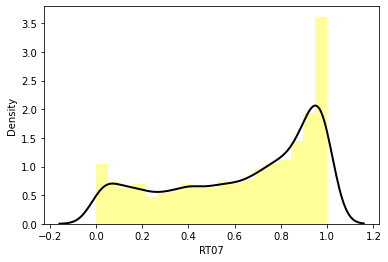

In [104]:
import seaborn as sns

#RT07
ax = sns.distplot(data['RT07'], color='yellow', kde_kws={"color": "k", "lw": 2})

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


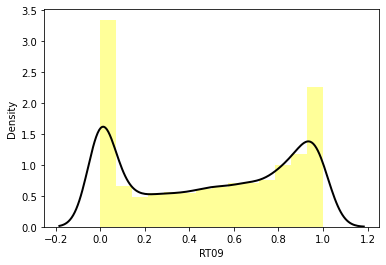

In [105]:
#RT09
ax1 = sns.distplot(data['RT09'], color='yellow', kde_kws={"color": "k", "lw": 2})

In [106]:
#extracting investors only whose tolerance level has changed less than 10% from 2007 to 2009

data = data[data['PercentChange']<=0.1]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1956 entries, 40 to 19278
Columns: 522 entries, YY1 to PercentChange
dtypes: float64(217), int64(305)
memory usage: 7.8 MB


In [107]:
data['AverageRiskTolerance'] = (data['RT07']+data['RT09'])/2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [108]:
data = data.drop(labels = ['RT07', 'RT09', 'PercentChange'], axis=1)

In [109]:
features = ['AGE07','EDCL07','MARRIED07','KIDS07','OCCAT107','INCOME07','RISK07','NETWORTH07','AverageRiskTolerance']

drop_features = [col for col in data.columns if col not in features]

data = data.drop(labels=drop_features, axis=1)

In [110]:
data.head()

,AGE07,EDCL07,MARRIED07,KIDS07,OCCAT107,INCOME07,RISK07,NETWORTH07,AverageRiskTolerance
40,65,4,1,0,3,55378.767875,3,1.024620e+06,0.840871
41,65,4,1,0,3,55378.767875,3,2.091286e+06,0.840871
42,65,4,1,0,3,54313.791570,3,1.449215e+06,0.840871
43,65,4,1,0,3,55378.767875,3,1.894419e+06,0.840871
44,65,4,1,0,3,54313.791570,3,1.677047e+06,0.840871


In [111]:
data.shape

(1956, 9)

In [112]:
#Train test split
from sklearn.model_selection import train_test_split

X = data.drop(labels = ['AverageRiskTolerance'], axis=1)
y = data['AverageRiskTolerance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [113]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [114]:
models = []
models.append(('LR', LinearRegression()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
models.append(('RFR', RandomForestRegressor()))

In [115]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

results = []
names = []
for name, model in models:
  kf = KFold(10)
  cv_results = -1*cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')
  results.append(cv_results)
  names.append(name)
  print(name, "=", cv_results.mean())

LR = -0.11017178236349397
KNN = -0.2896993185526052
CART = -0.5886054220632961
SVR = -0.0707842876622374
RFR = -0.7284221909129724


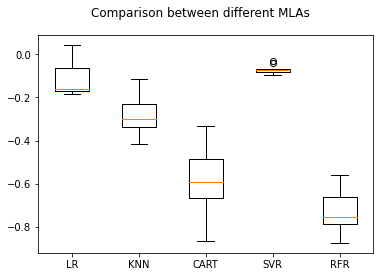

In [116]:
import matplotlib.pyplot as plt

fig = plt.figure()
fig.suptitle('Comparison between different MLAs')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [117]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50,100,150,200,250,300,350,400,500,600]}
model = RandomForestRegressor()
kf = KFold(n_splits=10)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='r2', cv=kf)
grid_result = grid.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.725502 using {'n_estimators': 200}
0.719854 (0.101313) with: {'n_estimators': 50}
0.721520 (0.104268) with: {'n_estimators': 100}
0.724504 (0.097574) with: {'n_estimators': 150}
0.725502 (0.097464) with: {'n_estimators': 200}
0.720868 (0.098750) with: {'n_estimators': 250}
0.720772 (0.103563) with: {'n_estimators': 300}
0.723905 (0.102063) with: {'n_estimators': 350}
0.725419 (0.099466) with: {'n_estimators': 400}
0.724408 (0.097397) with: {'n_estimators': 500}
0.725019 (0.100925) with: {'n_estimators': 600}


In [118]:
model = RandomForestRegressor(n_estimators = 600)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=400)

In [119]:
predictions_train = model.predict(X_train)
print(r2_score(y_train, predictions_train))

0.9663488816844056


In [120]:
predictions = model.predict(X_test)
print(mean_squared_error(y_test, predictions))
print(r2_score(y_test, predictions))

0.00890778687628491
0.7525678461560867


In [121]:
from pickle import dump
from pickle import load

filename = 'model.sav'
dump(model, open(filename, 'wb'))

In [122]:
loaded_model = load(open(filename, 'rb'))

In [123]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

predictions = loaded_model.predict(X_test)
result = mean_squared_error(y_test, predictions)
print("R2 score = ",r2_score(y_test, predictions))
print("MSE = ",result)

R2 score =  0.7525678461560867
MSE =  0.00890778687628491
